#Clustering - Extraindo Padrões dos Dados

Extrai um dataset com dados de uso de cartão de crédito de diferentes clientes para analisar o comportamento dos mesmos

In [1]:
import pandas as pd

dataframe = pd.read_csv("https://github.com/alura-cursos/alura-clustering-validation/raw/base-de-dados/CC%20GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
# Verifica valores faltantes no dataframe
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
#Aplica a mediana para as células com valores faltantes
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
#Realiza a normalização para que as colunas possuam valores numéricos entre zero e um
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


Aplica a clusterização

In [5]:
#Usa o kmeans para criação de 5 clusters
#n_init: como o kmeans é um algoritimo não determinístico, este parâmetro é usado para determinar q o algoritmo deve ter o mesmo resultado pelo menos 10 vezes para melhor consistência do modelo
#max_iter: define o número máximo de iterações
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

Gera diferentes métricas de avaliação de clusters, todas focando em separabilidade (distância entre clusters) e compactação (distância entre os pontos de cada cluster)

In [6]:
#Gera a métrica Silhouette
#metric: determina a métrica de cálculo da distância a ser usada
#O Silhouette apresenta valores entre -1 e 1 e quanto mais próximo de 1 melhor, sendo considerada uma métrica "boa em geral" (embora dependa de cada negócio) quando é positiva
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3646070028151538


In [7]:
#Gera a métrica Davies-Bouldin
#Diferencia-se do Silhouette em razão do cálculo da métrica de distância ser feito a partir do centroid e não dos demais pontos
#quanto maior melhor, geralmente é avaliado em comparação com outros clusters
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0751609635796857


In [8]:
#Gera a métrica Calinski-Harabrasz
#quanto maior melhor, geralmente é avaliado em comparação com outros clusters
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.5855153245097


Aplicando a clusterização como um método a fim de produzir e avaliar diferentes clusterizações

In [9]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [10]:
#Aciona o método solicitando 3 clusters
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [11]:
#Aciona o método solicitando 5 clusters
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36452005961784345 1.0760590116070008 3431.7947126165723


In [12]:
#Aciona o método solicitando 50 clusters
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.25322343778790857 1.2400107311502078 1611.3327967493353


Gera um modelo de clusterização sobre dados aleatórios para fins de comparação - Baseline

In [13]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
#Apresenta as métricas do cluster com o conjunto de dados original e abaixo as métricas do cluster com o conjunto de dados aleatório
#Espera-se que as métricas do conjunto original sejam significativamente melhor do que do conjunto aleatório
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039411040152764476 3.575650280078662 302.76915041294967
0.36452005961784345 1.0760590116070008 3431.7947126165723


In [14]:
#Cria 3 divisões do dataset original para avaliar a convergência das métricas sobre os subconjuntos de dados
#Espera-se que sejam métricas parecidas se for um bom modelo de clusterização
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.056334697944936 1204.111582769171
0.3533685733592382 1.1419144796646459 1194.9339115592925
0.3617903683784798 1.1524376971638408 1159.0068187799504


Gera visualizações para análise dos dados

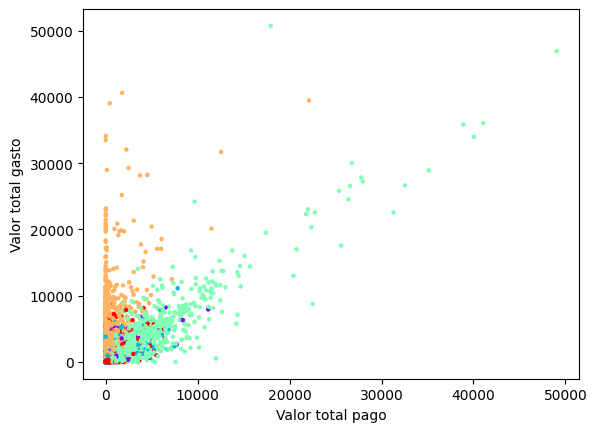

In [15]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

#Ex de análise: Laranjados gastam, mas não pagam

In [16]:
#Gera gráficos para diferentes pares de métricas do conjunto de dados
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

Quando a visualização se torna difícil de ser analisada, pode-se buscar as estatísticas básicas das métricas do conjunto original após a separação dos clusters para melhor compreensão dos mesmos

In [17]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         399.0  1974.217809  1838.076622  70.794108  1012.508134   
1        2642.0  3044.311461  2482.114159   6.824905  1263.747824   
2        1540.0  1145.339059  1664.041010   0.000000   212.974614   
3        1082.0  1799.423099  1979.373755   0.000000   508.591283   
4        3287.0   444.316391   846.429565   0.000000    23.394451   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1322.647480  2138.678431  11670.179850             399.0  0.989170   
1        2173.994774  4237.041814  18495.558550            2642.0  0.964891   
2         558.133650  1373.997246  19043.138560            1540.0  0.927935   
3        1099.666578  2321.485425  14581.459140            1082.0  0.862883   
4          83.148283   411.938506   9630.367575            3287.0  0.774261   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7305.064790  76406.207520            399.0  0.019899   
1        ...      1331.273048   8345.641905           2642.0  0.001772   
2        ...       526.841759  18621.013310           1540.0  0.277899   
3        ...       887.859119  21235.065300           1082.0  0.115930   
4        ...       249.201172   4483.503862           3287.0  0.246341   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.092198  0.0  0.0  0.000000  0.000000  1.0  
1        0.023236  0.0  0.0  0.000000  0.000000  0.6  
2        0.366802  0.0  0.0  0.083333  0.545455  1.0  
3        0.186293  0.0  0.0  0.083333  0.142857  1.0  
4        0.346540  0.0  0.0  0.000000  0.444444  1.0  

[5 rows x 128 columns]

In [18]:
#Apresenta os centroids de cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[3.26679916e-01 2.64829600e-04 1.56367224e-01 3.20340338e-02
  1.24729430e-01 5.86775487e-02 1.64809825e-04 2.31534645e-05
  1.48371109e-04 1.95846914e-05 4.30284595e-04 3.84388626e-03
  3.71254413e-01 2.50660336e-01 6.87940333e-01 4.36745512e-06]
 [5.05890305e-01 2.73068755e-04 6.25559287e-02 3.68154874e-02
  2.57622119e-02 2.50096730e-01 6.83022335e-05 2.62345319e-05
  4.55565431e-05 5.70526899e-05 1.14548582e-03 1.34969401e-03
  7.18871804e-01 1.66266897e-01 1.80430662e-01 5.33805925e-07]
 [1.60583049e-01 2.45310265e-04 4.38129130e-01 2.56790685e-01
  1.81506844e-01 2.60076677e-02 2.04519716e-04 8.90590783e-05
  1.50755658e-04 9.46297171e-06 1.73812691e-04 6.17747277e-03
  6.02280929e-01 4.04406215e-01 8.58271588e-02 7.18891263e-05]
 [2.36537957e-01 2.16985362e-04 5.90300223e-02 3.35832245e-02
  2.54519642e-02 4.04086274e-01 5.17036418e-05 2.02343386e-05
  3.43414658e-05 6.60649526e-05 1.58615538e-03 1.09745723e-03
  5.37280111e-01 5.92393103e-01 1.05214325e-01 2.74078667e-05]
 [6.

In [19]:
#Apresenta a variância de cada coluna de dados para entender quais são os atributos mais relevantes para a clusterização
#Em geral quanto maior a variância maior a relevância
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0365
PAYMENTS 
0.0274
MINIMUM_PAYMENTS 
0.0557
PRC_FULL_PAYMENT 
0.0000


In [20]:
#Apresenta para cada um dos 5 clusters, o valor médio para cada uma das colunas mais relevantes da clusterização
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1974.217809   851.108872    418.674573   2220.050125  1333.712115   
1        3044.311461   388.784455   1622.217251   4490.934898   967.870896   
2        1145.339059  3269.532519    184.313078   4089.000098  3048.332290   
3        1799.423099   465.816645   3283.984219   3983.938274  4666.441630   
4         444.316391   630.614116    143.241332   5130.908661   814.983226   

         n_clients  
cluster             
0              399  
1             2642  
2             1540  
3             1082  
4             3287  


<ipython-input-20-d66fe91a9ab8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Analisando os dados obtidos acima: 

*Obs: a ordem dos clusters pode variar.

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [21]:
#Apresenta as estatísticas básicas para uma das métricas acima consideradas relevantes a fim de melhor conhecer o comportamento 
#desta métrica nos diferentes clusters
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,399.0,0.019899,0.092198,0.0,0.0,0.000000,0.000000,1.0
1,2642.0,0.001772,0.023236,0.0,0.0,0.000000,0.000000,0.6
2,1540.0,0.277899,0.366802,0.0,0.0,0.083333,0.545455,1.0
3,1082.0,0.115930,0.186293,0.0,0.0,0.083333,0.142857,1.0
4,3287.0,0.246341,0.346540,0.0,0.0,0.000000,0.444444,1.0
